# Подключение бибилиотек

In [ ]:
!pip install patool
import patoolib


     |████████████████████████████████| 77 kB 4.6 MB/s 


In [ ]:
from tensorflow.keras.models import Model # Импортируем модели keras: Model
from tensorflow.keras.layers import Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization # Импортируем стандартные слои keras
from tensorflow.keras import backend as K # Импортируем модуль backend keras'а
from tensorflow.keras.optimizers import Adam # Импортируем оптимизатор Adam
from tensorflow.keras import utils # Импортируем модуль utils библиотеки tensorflow.keras для получения OHE-представления
from google.colab import files # Импортируем Модуль files для работы с файлами
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib для построения графиков
from tensorflow.keras.preprocessing import image # Импортируем модуль image для работы с изображениями
from tensorflow.keras import callbacks
import numpy as np # Импортируем библиотеку numpy
from sklearn.model_selection import train_test_split
import time
import random
import os # Импортируем библиотеку os для раоты с фаловой системой
from PIL import Image # импортируем модель Image для работы с изображениями

In [ ]:
from google.colab import drive # Подключаем гугл-диск
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.mkdir("/content/skindeasises")
patoolib.extract_archive("/content/drive/MyDrive/origin.rar", outdir="/content/skindeasises")
patoolib.extract_archive("/content/drive/MyDrive/segmentation.rar", outdir="/content/skindeasises")

patool: Extracting /content/drive/MyDrive/origin.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/origin.rar
patool:     with cwd='/content/skindeasises'
patool: ... /content/drive/MyDrive/origin.rar extracted to `/content/skindeasises'.
patool: Extracting /content/drive/MyDrive/segmentation.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/segmentation.rar
patool:     with cwd='/content/skindeasises'
patool: ... /content/drive/MyDrive/segmentation.rar extracted to `/content/skindeasises'.


'/content/skindeasises'

#Сегментация кожных заболеваний


In [ ]:
img_height = 256
img_width = 192

In [ ]:
directory = '/content/skindeasises'
origin = 'origin'
ctg = 'Акне' #/content/skindeasises/origin/Акне/
filename = 'Img_10.jpeg'
img = image.load_img(os.path.join(directory,origin,ctg,filename), target_size=(img_width, img_height))

In [ ]:
image.img_to_array(img).shape

(192, 256, 3)

In [ ]:
images_origins = [] # Создаем пустой список для хранений оригинльных изображений обучающей выборки
images_segments = []
directory = '/content/skindeasises'
origin = 'origin'
segments = 'segmentation'
print(os.path.join(directory, origin))

cur_time = time.time() # Засекаем текущее время
cnt = 1900
for ctg in sorted(os.listdir(os.path.join(directory, origin))):
  for filename in sorted(os.listdir(os.path.join(directory,origin,ctg))): # Проходим по всем файлам в каталоге по указанному пути 
    if cnt>0:
      img = image.load_img(os.path.join(directory,origin,ctg,filename), target_size=(img_width, img_height)) 
      images_origins.append(img)  
      #images_origins.append(image.img_to_array(img)) # Читаем очередную картинку и добавляем ее в список изображения с указанным target_size                                                      
      sgmfilename = filename.split('.')[0] + ' копия.bmp'
      img = image.load_img(os.path.join(directory,segments,ctg,sgmfilename), target_size=(img_width, img_height))
      #images_segments.append(image.img_to_array(img)) # Читаем очередную картинку и добавляем ее в список изображения с указанным target_size                                                      
      images_segments.append(img)
      cnt -=1

print ('Обучающая выборка загружена. Время загрузки: ', time.time() - cur_time, 'c', sep='') # Отображаем время загрузки картинок обучающей выборки

/content/skindeasises/origin
Обучающая выборка загружена. Время загрузки: 32.296112060546875c


In [ ]:
len(images_origins)

1900

In [ ]:
x_Train.shape, images_origins

((2000, 192, 256, 3), 0)

In [ ]:
np.random.randint(0, x_Train.shape[0], 5)

array([1341,   20, 3248, 2988,  474])

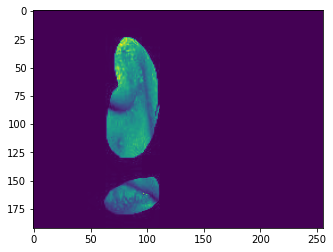

In [ ]:
plt.imshow(image.array_to_img(y_Train[10]), )

In [ ]:
def plotImages(xImgs, yImgs, shapex=(img_height, img_width)): # создадим функцию для вывода изображений как картинок
  n = 5  # количество картинок, которые хотим показать
  plt.figure(figsize=(26, 6)) # указываем размеры фигуры
  for i in range(n): # для каждой картинки из n(5)
      index = np.random.randint(0, yImgs.shape[0]) # startIndex - начиная с какого индекса хотим заплотить картинки
      # Показываем картинки из тестового набора
      ax = plt.subplot(2, n, i + 1) # выведем область рисования Axes
      plt.imshow(image.array_to_img((xImgs[index].reshape(shapex)))) # отрисуем правильные картинки в размере 112*80      
      #plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скр ываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y

      # Показываем восстановленные картинки
      ax = plt.subplot(2, n, i + 1 + n) # выведем область рисования Axes 
      plt.imshow(yImgs[index].reshape(shapex[0], shapex[1])) # отрисуем обработанные сеткой картинки в размере 112*80     
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y
  plt.show()

In [ ]:
y_Train[y_Train > 20] = 255

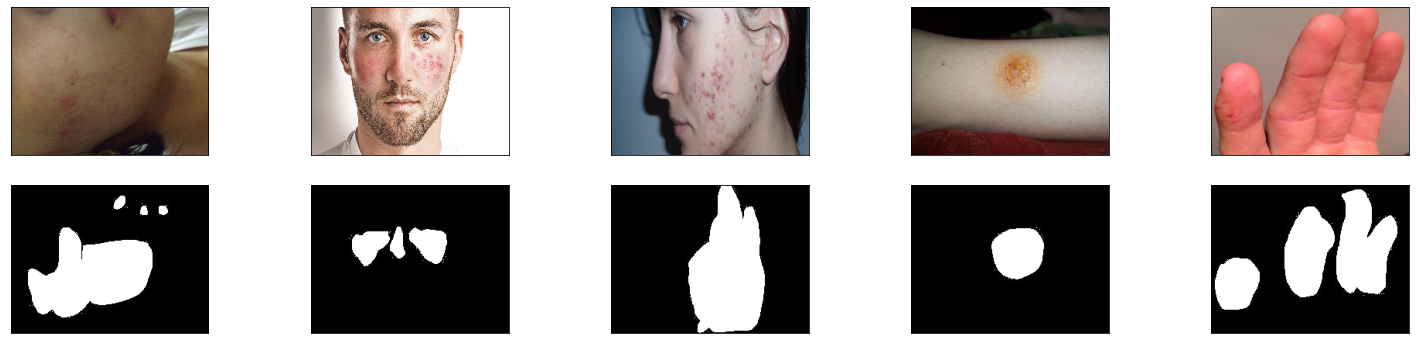

In [ ]:
plotImages(x_Train, y_Train, shapex  =(img_width, img_height, 3) )

In [ ]:
# Функция преобразования пикселя сегментированного изображения в индекс (6 классов)
def color2index(color):
    index=0
    if (color[0]) > 20  : index = 1 # самолет    
    return index  

In [ ]:
def index2color(index2):
    index = np.argmax(index2)
    color=[]
    if index == 0:
        color = [0, 0, 0]  # фон
    elif index == 1:
        color = [255, 0, 0]  # самолет
    return color 

In [ ]:
# Функция перевода индекса пиксeля в to_categorical
def rgbToohe(y, num_classes): 
  y2 = y.copy() # Создаем копию входного массива
  y = y.reshape(y.shape[0] * y.shape[1], 3) # Решейпим в двумерный массив
  yt = [] # Создаем пустой лист
  for i in range(len(y)): # Проходим по всем трем канала изображения
    yt.append(utils.to_categorical(color2index(y[i]), num_classes=num_classes)) # Переводим пиксели в индексы и преобразуем в OHE
  yt = np.array(yt) # Преобразуем в numpy
  yt = yt.reshape(y2.shape[0], y2.shape[1], num_classes) # Решейпим к исходныму размеру
  return yt # Возвращаем сформированный массив

In [ ]:
# Функция формирования yTrain
def yt_prep(data, num_classes):
  yTrain = [] # Создаем пустой список под карты сегметации
  for seg in data: # Пробегаем по всем файлам набора с сегминтированными изображениями
    y = image.img_to_array(seg) # Переводим изображение в numpy-массив размерностью: высота - ширина - количество каналов
    y = rgbToohe(y, num_classes) # Получаем OHE-представление сформированного массива
    yTrain.append(y) # Добавляем очередной элемент в yTrain
    if len(yTrain) % 100 == 0: # Каждые 100 шагов
      print(len(yTrain)) # Выводим количество обработанных изображений
  return np.array(yTrain) # Возвращаем сформированный yTrain

In [ ]:
cur_time = time.time()
yTrain = yt_prep(y_Train, num_classes) 
print('Время обработки: ', round(time.time() - cur_time, 2),'c')

In [ ]:
num_classes = 2

In [ ]:
# Функция преобразования пикселя сегментированного изображения в индекс (6 классов)
def color2index(color):
    index=0
    if (color[0] + color[1] + color[2]) > 20  : index = 1 # самолет    
    return index  

def index2color(index2):
    index = np.argmax(index2)
    color=[]
    if index == 0:
        color = [0,0,0]  # фон
    elif index == 1:
        color = [255,0,0]  # выделение
    return color

# Функция перевода индекса пикслея в to_categorical
def rgbToOHE(y, num_classes): 
  y2 = y.copy() # Создаем копию входного массива
  y = y.reshape(y.shape[0] * y.shape[1], 3) # Решейпим в двумерный массив
  yt = [] # Создаем пустой лист
  for i in range(len(y)): # Проходим по всем трем канала изображения
    yt.append(utils.to_categorical(color2index(y[i]), num_classes=num_classes)) # Переводим пиксели в индексы и преобразуем в OHE
  yt = np.array(yt) # Преобразуем в numpy
  yt = yt.reshape(y2.shape[0], y2.shape[1], num_classes) # Решейпим к исходныму размеру
  return yt # Возвращаем сформированный массив

# Функция формирования yTrain
def yt_prep(data, num_classes):
  yTr = [] # Создаем пустой список под карты сегметации
  for seg in data: # Пробегаем по всем файлам набора с сегминтированными изображениями
    y = image.img_to_array(seg) # Переводим изображение в numpy-массив размерностью: высота - ширина - количество каналов
    y = rgbToOHE(y, num_classes) # Получаем OHE-представление сформированного массива
    yTr.append(y) # Добавляем очередной элемент в yTrain
    if len(yTr) % 100 == 0: # Каждые 100 шагов
      print(len(yTrain)) # Выводим количество обработанных изображений
  return np.array(yTr) # Возвращаем сформированный yTrain

In [ ]:
xTrain = [] # Создаем пустой список под обучающую выборку
for img in images_origins: 
    x = image.img_to_array(img) # Переводим изображение в numpy-массив размерностью: высота - ширина - количество каналов
    xTrain.append(x) # Добавляем очередной элемент в xTrain
xTrain = np.array(xTrain) # Переводим в numpy
print(xTrain.shape) # Размерность обучающей выборки

(1900, 192, 256, 3)


In [ ]:
cur_time = time.time()
yTrain = yt_prep(images_segments, num_classes) 
print('Время обработки: ', round(time.time() - cur_time, 2),'c')

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
Время обработки:  1529.9 c


In [ ]:
np.save("/content/drive/MyDrive/xSkins", xTrain)
np.save("/content/drive/MyDrive/ySkins", yTrain)

In [ ]:
xTrain = np.load("/content/drive/MyDrive/xSkins.npy")
yTrain = np.load("/content/drive/MyDrive/ySkins.npy")

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(xTrain, yTrain, test_size = 0.05, shuffle = True)

In [ ]:
#deallocate memory
xTrain = 0
yTrain = 0

In [ ]:
x_train.shape

(1805, 192, 256, 3)

## Обучение модели

In [ ]:
print(x_train.shape, y_train.shape)

(1805, 192, 256, 3) (1805, 192, 256, 2)


In [ ]:
'''
  функция метрики, обрабатывающая пересечение двух областей
'''
def dice_coef(y_true, y_pred):
    return (2. * K.sum(y_true * y_pred) + 1.) / (K.sum(y_true) + K.sum(y_pred) + 1.) # Возвращаем площадь пересечения деленную на площадь объединения двух областей

'''
  Функция создания сети
    Входные параметры:
    - num_classes - количество классов
    - input_shape - размерность карты сегментации
'''
def unet(num_classes = 3, input_shape= (88, 120, 3)):
    img_input = Input(input_shape)                                         # Создаем входной слой с размерностью input_shape

    # Block 1
    x = Conv2D(20, (3, 3), padding='same', name='block1_conv1')(img_input) # Добавляем Conv2D-слой с 64-нейронами
    x = BatchNormalization()(x)                                            # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                              # Добавляем слой Activation

    x = Conv2D(20, (3, 3), padding='same', name='block1_conv2')(x)         # Добавляем Conv2D-слой с 64-нейронами
    x = BatchNormalization()(x)                                            # Добавляем слой BatchNormalization
    block_1_out = Activation('relu')(x)                                    # Добавляем слой Activation и запоминаем в переменной block_1_out
    print(block_1_out.shape)
    x = MaxPooling2D()(block_1_out)                                        # Добавляем слой MaxPooling2D

    # Block 2
    x = Conv2D(40, (3, 3), padding='same', name='block2_conv1')(x)        # Добавляем Conv2D-слой с 128-нейронами
    x = BatchNormalization()(x)                                            # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                              # Добавляем слой Activation

    x = Conv2D(40, (3, 3), padding='same', name='block2_conv2')(x)        # Добавляем Conv2D-слой с 128-нейронами
    x = BatchNormalization()(x)                                            # Добавляем слой BatchNormalization
    block_2_out = Activation('relu')(x)                                    # Добавляем слой Activation и запоминаем в переменной block_2_out
    print(block_2_out.shape)
    x = MaxPooling2D()(block_2_out)                                        # Добавляем слой MaxPooling2D

    # Block 3
    x = Conv2D(80, (3, 3), padding='same', name='block3_conv1')(x)        # Добавляем Conv2D-слой с 256-нейронами
    x = BatchNormalization()(x)                                            # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                              # Добавляем слой Activation

    x = Conv2D(80, (3, 3), padding='same', name='block3_conv2')(x)        # Добавляем Conv2D-слой с 256-нейронами
    x = BatchNormalization()(x)                                            # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                              # Добавляем слой Activation

    x = Conv2D(80, (3, 3), padding='same', name='block3_conv3')(x)        # Добавляем Conv2D-слой с 256-нейронами
    x = BatchNormalization()(x)                                            # Добавляем слой BatchNormalization
    block_3_out = Activation('relu')(x)                                    # Добавляем слой Activation и запоминаем в переменной block_3_out
    print(block_3_out.shape)
    x = MaxPooling2D()(block_3_out)                                        # Добавляем слой MaxPooling2D

    # Block 4
    x = Conv2D(160, (3, 3), padding='same', name='block4_conv1')(x)        # Добавляем Conv2D-слой с 512-нейронами
    x = BatchNormalization()(x)                                            # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                              # Добавляем слой Activation

    x = Conv2D(160, (3, 3), padding='same', name='block4_conv2')(x)        # Добавляем Conv2D-слой с 256-нейронами
    x = BatchNormalization()(x)                                            # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                              # Добавляем слой Activation

    x = Conv2D(160, (3, 3), padding='same', name='block4_conv3')(x)        # Добавляем Conv2D-слой с 256-нейронами
    x = BatchNormalization()(x)                                            # Добавляем слой BatchNormalization
    block_4_out = Activation('relu')(x)                                    # Добавляем слой Activation и запоминаем в переменной block_4_out
    x = block_4_out 

    # UP 2
    x = Conv2DTranspose(80, (2, 2), strides=(2, 2), padding='same')(x)    # Добавляем слой Conv2DTranspose с 256 нейронами
    x = BatchNormalization()(x)                                            # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                              # Добавляем слой Activation

    x = concatenate([x, block_3_out])                                      # Объединем текущий слой со слоем block_3_out
    x = Conv2D(80, (3, 3), padding='same')(x)                             # Добавляем слой Conv2D с 256 нейронами
    x = BatchNormalization()(x)                                            # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                              # Добавляем слой Activation
    print(1, x.shape, block_3_out.shape)
    x = Conv2D(80, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)                                            # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                              # Добавляем слой Activation

    # UP 3
    x = Conv2DTranspose(40, (2, 2), strides=(2, 2), padding='same')(x)    # Добавляем слой Conv2DTranspose с 128 нейронами
    x = BatchNormalization()(x)                                            # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                              # Добавляем слой Activation

    x = concatenate([x, block_2_out])                                      # Объединем текущий слой со слоем block_2_out
    x = Conv2D(40, (3, 3), padding='same')(x)                             # Добавляем слой Conv2D с 128 нейронами
    x = BatchNormalization()(x)                                            # Добавляем слой BatchNormalization
    x = Activation('relu')(x)                                              # Добавляем слой Activation
    print(2)
    x = Conv2D(40, (3, 3), padding='same')(x) # Добавляем слой Conv2D с 128 нейронами
    x = BatchNormalization()(x) # Добавляем слой BatchNormalization
    x = Activation('relu')(x) # Добавляем слой Activation

    # UP 4
    x = Conv2DTranspose(20, (2, 2), strides=(2, 2), padding='same')(x) # Добавляем слой Conv2DTranspose с 64 нейронами
    x = BatchNormalization()(x) # Добавляем слой BatchNormalization
    x = Activation('relu')(x) # Добавляем слой Activation

    x = concatenate([x, block_1_out])  # Объединем текущий слой со слоем block_1_out
    x = Conv2D(20, (3, 3), padding='same')(x) # Добавляем слой Conv2D с 64 нейронами
    x = BatchNormalization()(x) # Добавляем слой BatchNormalization
    x = Activation('relu')(x) # Добавляем слой Activation
    print(3)
    x = Conv2D(20, (3, 3), padding='same')(x) # Добавляем слой Conv2D с 64 нейронами
    x = BatchNormalization()(x) # Добавляем слой BatchNormalization
    x = Activation('relu')(x) # Добавляем слой Activation

    x = Conv2D(num_classes, (3, 3), activation='softmax', padding='same')(x)  # Добавляем Conv2D-Слой с softmax-активацией на num_classes-нейронов

    model = Model(img_input, x) # Создаем модель с входом 'img_input' и выходом 'x'

    # Компилируем модель 
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=[dice_coef])
    
    return model # Возвращаем сформированную модель

In [ ]:
modelSkins = unet(2, (192,256, 3))
modelSkins.summary()

(None, 192, 256, 20)
(None, 96, 128, 40)
(None, 48, 64, 80)
1 (None, 48, 64, 80) (None, 48, 64, 80)
2
3
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 192, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 192, 256, 20) 560         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 192, 256, 20) 80          block1_conv1[0][0]               
__________________________________________________________________________________________________
activation (Activation)         (None, 192, 256, 20) 0           batch_normalization[0][0

In [ ]:
modelSkins.save_weights("/content/drive/MyDrive/HW14080921.h5")
history = modelSkins.fit(x_train, y_train, epochs=40, batch_size=10, validation_data = (x_val, y_val)) 
modelSkins.save_weights("/content/drive/MyDrive/HW14080921.h5")

Epoch 1/40
181/181 [==============================] - 83s 278ms/step - loss: 0.4633 - dice_coef: 0.7020 - val_loss: 0.5634 - val_dice_coef: 0.7695
Epoch 2/40
181/181 [==============================] - 48s 265ms/step - loss: 0.4312 - dice_coef: 0.7257 - val_loss: 0.7585 - val_dice_coef: 0.7375
Epoch 3/40
181/181 [==============================] - 48s 265ms/step - loss: 0.4195 - dice_coef: 0.7313 - val_loss: 0.5308 - val_dice_coef: 0.7577
Epoch 4/40
181/181 [==============================] - 48s 265ms/step - loss: 0.4203 - dice_coef: 0.7297 - val_loss: 0.5596 - val_dice_coef: 0.7782
Epoch 5/40
181/181 [==============================] - 48s 265ms/step - loss: 0.4103 - dice_coef: 0.7378 - val_loss: 0.4113 - val_dice_coef: 0.7274
Epoch 6/40
181/181 [==============================] - 48s 264ms/step - loss: 0.4014 - dice_coef: 0.7420 - val_loss: 0.4233 - val_dice_coef: 0.7485
Epoch 7/40
181/181 [==============================] - 48s 265ms/step - loss: 0.3931 - dice_coef: 0.7504 - val_loss: 0.

In [ ]:
modelSkins.compile(optimizer=Adam(learning_rate=0.00001),
                  loss='categorical_crossentropy',
                  metrics=[dice_coef])
history = modelSkins.fit(x_train, y_train, epochs=30, batch_size=1, validation_data = (x_val, y_val)) 

Epoch 1/30
1805/1805 [==============================] - 98s 53ms/step - loss: 0.3735 - dice_coef: 0.8031 - val_loss: 0.2799 - val_dice_coef: 0.8482
Epoch 2/30
1805/1805 [==============================] - 95s 53ms/step - loss: 0.3493 - dice_coef: 0.7981 - val_loss: 0.2722 - val_dice_coef: 0.8375
Epoch 3/30
1805/1805 [==============================] - 95s 53ms/step - loss: 0.3404 - dice_coef: 0.7955 - val_loss: 0.2754 - val_dice_coef: 0.8369
Epoch 4/30
1805/1805 [==============================] - 95s 53ms/step - loss: 0.3349 - dice_coef: 0.7951 - val_loss: 0.2838 - val_dice_coef: 0.8340
Epoch 5/30
1805/1805 [==============================] - 95s 53ms/step - loss: 0.3305 - dice_coef: 0.7960 - val_loss: 0.3026 - val_dice_coef: 0.8317
Epoch 6/30
1805/1805 [==============================] - 95s 53ms/step - loss: 0.3267 - dice_coef: 0.7977 - val_loss: 0.2934 - val_dice_coef: 0.8313
Epoch 7/30
1805/1805 [==============================] - 95s 53ms/step - loss: 0.3233 - dice_coef: 0.7977 - val_l

## Распознавание



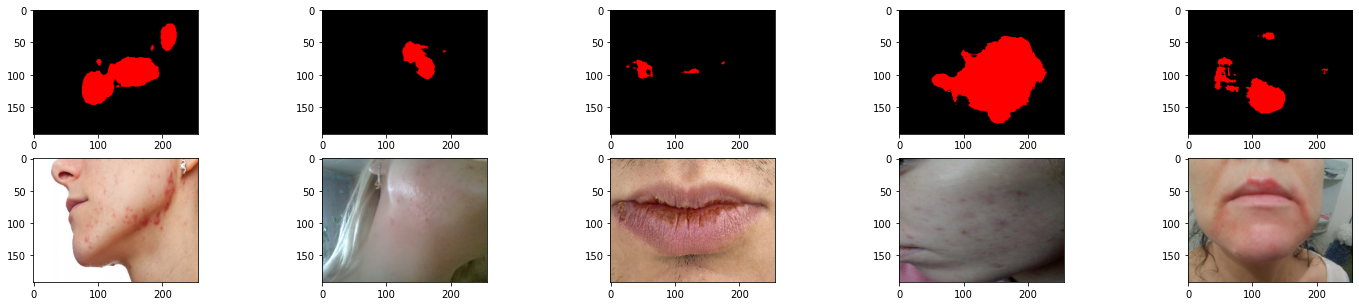

In [ ]:
count = 5
n_classes = 2
indexes = np.random.randint(0, len(x_val), count) # Получаем count случайных индексов
fig, axs = plt.subplots(2, count, figsize=(25, 5)) #Создаем полотно из n графиков
for i,idx in enumerate(indexes): # Проходим по всем сгенерированным индексам
  predict = np.array(modelSkins.predict(x_val[idx].reshape(1, img_width, img_height, 3))) # Предиктим картику
  pr = predict[0] # Берем нулевой элемент из перидкта
  pr1 = [] # Пустой лист под сегментированную картинку из predicta
  pr = pr.reshape(-1, n_classes) # Решейпим предикт
  for k in range(len(pr)): # Проходим по всем уровням (количесвто классов)
    pr1.append(index2color(pr[k])) # Переводим индекс в писксель
  pr1 = np.array(pr1) # Преобразуем в numpy
  pr1 = pr1.reshape(img_width, img_height,3) # Решейпим к размеру изображения
  img = Image.fromarray(pr1.astype('uint8')) # Получаем картику из предикта
  axs[0,i].imshow(img.convert('RGBA')) # Отображаем на графике в первой линии
  axs[1,i].imshow(Image.fromarray(x_val[idx].astype('uint8'))) # Отображаем на графике в третьей линии оригинальное изображение        
plt.show() 

### Наложение маски

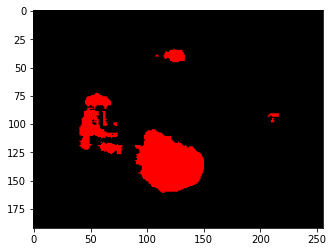

In [ ]:
seg = Image.fromarray(pr1.astype('uint8')).convert('RGBA')
plt.imshow(seg)

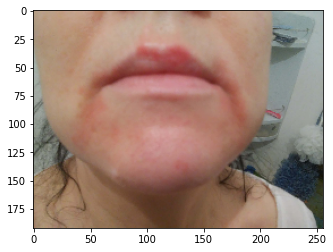

In [ ]:
plt.imshow(Image.fromarray(x_val[idx].astype('uint8')))